<Decision Tree>

Logistic Regression은 데이터에 대한 학습을 해야하고, 일반 사람들에게 설명을 하는 것이 어려울 수 있다. 

간단한 형태를 가져 직관적으로 이해하기 쉬운데, 분류 정확도도 높은 모델이 있다면 좋을 것이다. 

그 역할을 할 수 있는 것이 바로 Decision Tree(결정 트리) 학습법이다. 

그렇다면 결정 트리의 모양은 어떻게 생겼는가? 아래의 그림을 보자.

In [2]:
from IPython.display import Image

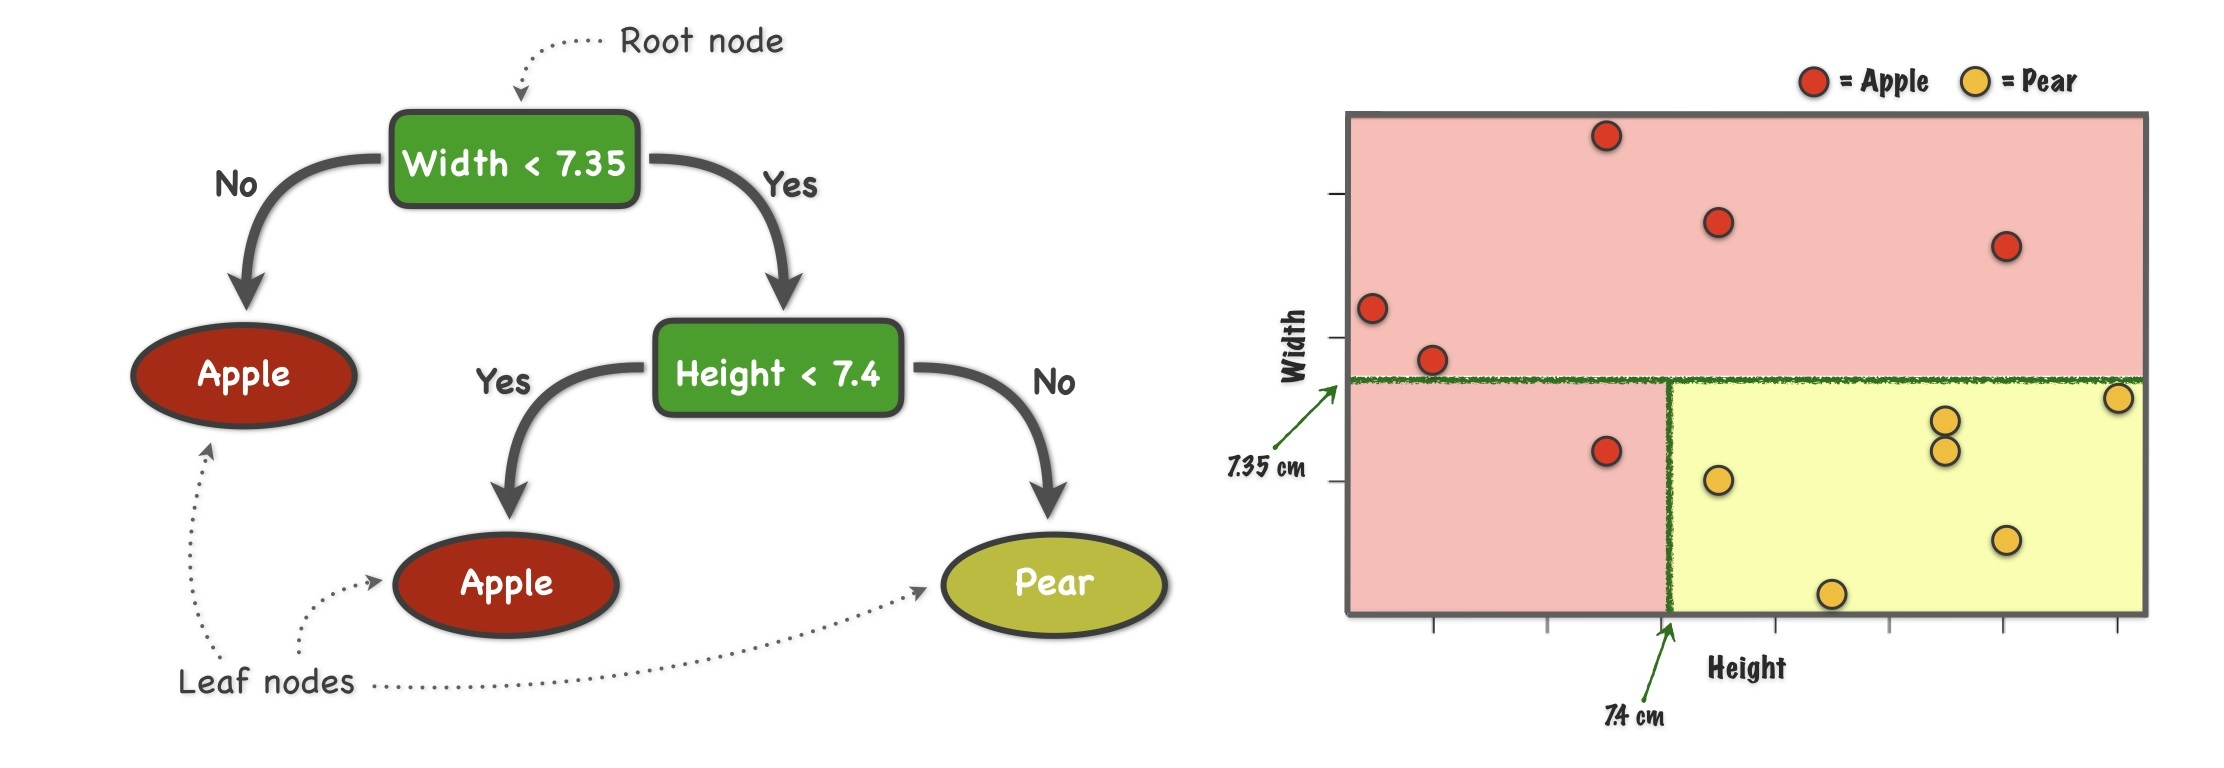

In [3]:
Image('C:/Users/User/Desktop/결정-트리-예시.jpg', width = 800, height = 500)

왼쪽은 트리 구조를 도식화 한 것이고, 오른쪽은 결정 트리의 작동 방식을 실제 데이터들이 존재하는 그리드 위에서 보여주는 그림이다. 우리가 흔히 아는 트리의 구조를 지니고 있다. 데이터의 분포를 고려하여 "가장 잘 나눌 수 있는 지점으로" 나누는(선을 긋는) 방식이다. 결정 트리는 한 번의 판단에 한 개의 변수만을 사용하여 이해가 쉽고 직관적이라는 장점이 있다. 

<주요 용어 정리>

Node: 입력 데이터 공간의 특정 영역
Parent node: 분기 (split) 전 노드
Child node: 부모 노드로부터 분기 후 파생된 노드
Split criterion: 한 부모 노드를 두 개 이상의 자식 노드들로 분기하는데 사용되는 변수 및 기준 값
Root node: 전체 데이터를 포함하는 노드이며 유일함, 자식 노드만 존재하며 부모 노드가 존재하지 않음
Leaf node: 더 이상 분기가 수행되지 않는 노드, 부모 노드만 존재하며 자식 노드가 존재하지 않음
Internal node: 앞의 노드 이외의 노드
Sibling: 같은 부모를 가지는 노드
Link: 노드를 연결하는 선 (edge 또는 branch라고도 함)

가장 잘 나눈다는 것의 의미가 무엇일까? 어떻게 해야 데이터를 가장 잘 나눈 것이라고 할 수 있을까? 예시를 한 번 보도록 하자.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# 예제 데이터 생성
raw_data = {'width': [7.1,7.9,7.4,8.2,7.6,7.8,7.0,7.1,6.8,6.6,7.3,7.2], 
            'height': [7.3,7.5,7.0,7.3,6.9,8.0,7.5,7.9,8.0,7.7,8.2,7.9], 
            'type': ['Apple','Apple','Apple','Apple','Apple','Apple','Pear','Pear','Pear','Pear','Pear','Pear']}

data = pd.DataFrame(raw_data)

In [5]:
data

,width,height,type
0,7.1,7.3,Apple
1,7.9,7.5,Apple
2,7.4,7.0,Apple
3,8.2,7.3,Apple
4,7.6,6.9,Apple
5,7.8,8.0,Apple
6,7.0,7.5,Pear
7,7.1,7.9,Pear
8,6.8,8.0,Pear
9,6.6,7.7,Pear


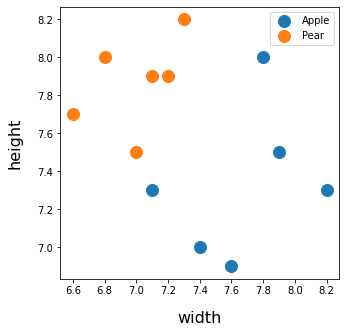

In [6]:
groups = data.groupby('type')
fig, ax = plt.subplots(figsize=(5,5))
ax.margins(0.05)
for name, group in groups:
    ax.plot(group.width, group.height, marker='o', linestyle='', ms=12)
ax.legend(['Apple', 'Pear'])
plt.xlabel('width', size = 16, labelpad=15)
plt.ylabel('height', size = 16, labelpad=15)
plt.show()

하지만 어디에 선을 그어야 잘 나누었다고 할 수 있을까? "잘" 의 객관적인 지표가 우리는 필요하다. 

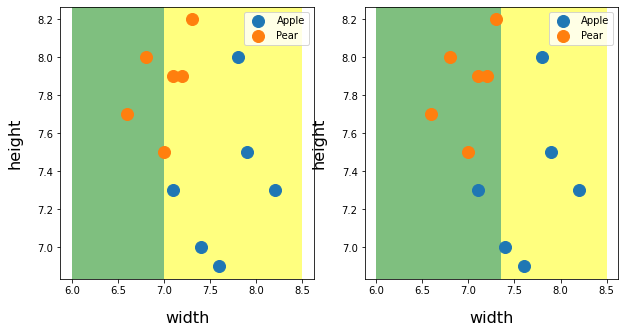

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.margins(0.05)
for name, group in groups:
    ax1.plot(group.width, group.height, marker='o', linestyle='', ms=12)
ax1.legend(['Apple', 'Pear'])
ax1.axvspan(6, 7.0, facecolor='green', alpha=0.5)
ax1.axvspan(7.0, 8.5, facecolor='yellow', alpha=0.5)
ax1.set_xlabel('width', size = 16, labelpad=15)
ax1.set_ylabel('height', size = 16, labelpad=15)

ax2.margins(0.05)
for name, group in groups:
    ax2.plot(group.width, group.height, marker='o', linestyle='', ms=12)
ax2.legend(['Apple', 'Pear'])
ax2.axvspan(6, 7.35, facecolor='green', alpha=0.5)
ax2.axvspan(7.35, 8.5, facecolor='yellow', alpha=0.5)
ax2.set_xlabel('width', size = 16, labelpad=15)
ax2.set_ylabel('height', size = 16, labelpad=15)

plt.show()

각각 width를 판단 변수로 놓고 7.0, 7.35 지점을 기준으로 분류해보았다. 직관적으로 볼 때 오른쪽의 그래프가 데이터들을 더 잘 분류한 것처럼 보인다. 하지만 위에서 서술했던 대로 "잘 분류한다"의 객관적인 지표가 필요하다.

객관적인 지표로는,

    -지니계수
    -엔트로피
    
등등의 방법이 있는데, 지금은 지니계수를 먼저 알아보도록 하자. 

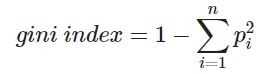

In [8]:
Image('C:/Users/User/Desktop/지니계수.jpg')

n개의 카테고리가 있는 상황에서의 지니계수는 다음과 같이 계산된다. 여기서 p_i는 전체(어떤 한 영역)에서 i번째 카테고리가 차지하는 비중이다. 예를 들어 위처럼 한 영역에 점이 12개 있고, 파란색 점이 6개 있다면 p_i는 1/2가 될 것이다. 

아무 분류도 하지 않고 초창기의 지니 계수를 계산해보면 0.5 이다. 이처럼 어떠한 분류를 하면 좋은 분류인지 나쁜 분류이던지 간에 지니 계수는 무조건 0.5보다 적은 값이 나올 것이다. 이럴 때 (이전의 지니계수) - (새로 분류한 지니계수) 를 한 값을 '정보 획득(information gain)' 이라고 한다.

예시로 왼쪽 그래프의 지니계수와 오른쪽 그래프의 지니계수를 계산하여 정보 획득의 차이를 한 번 알아보자. 

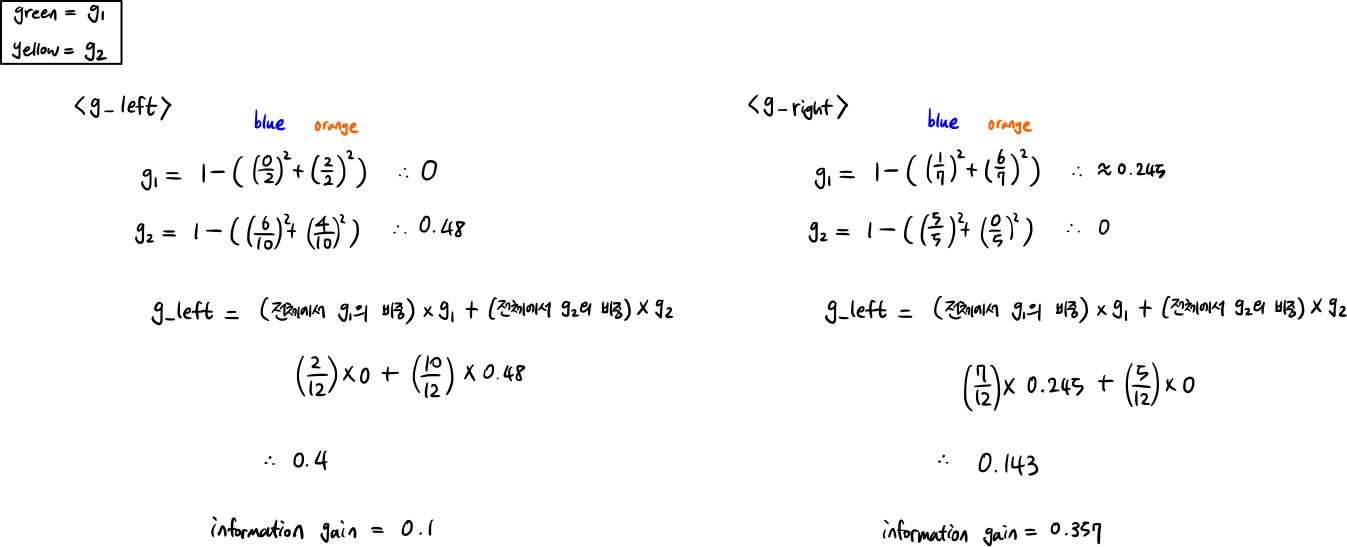

In [9]:
Image('C:/Users/User/Desktop/지니계수계산.png', width = 800, height = 500)

이렇게 우리는 객관적으로 오른쪽 그래프의 분류가 더 좋다고 말할 수 있는 것이다. 다 분류하면 그래프는 이렇게 변한다. 

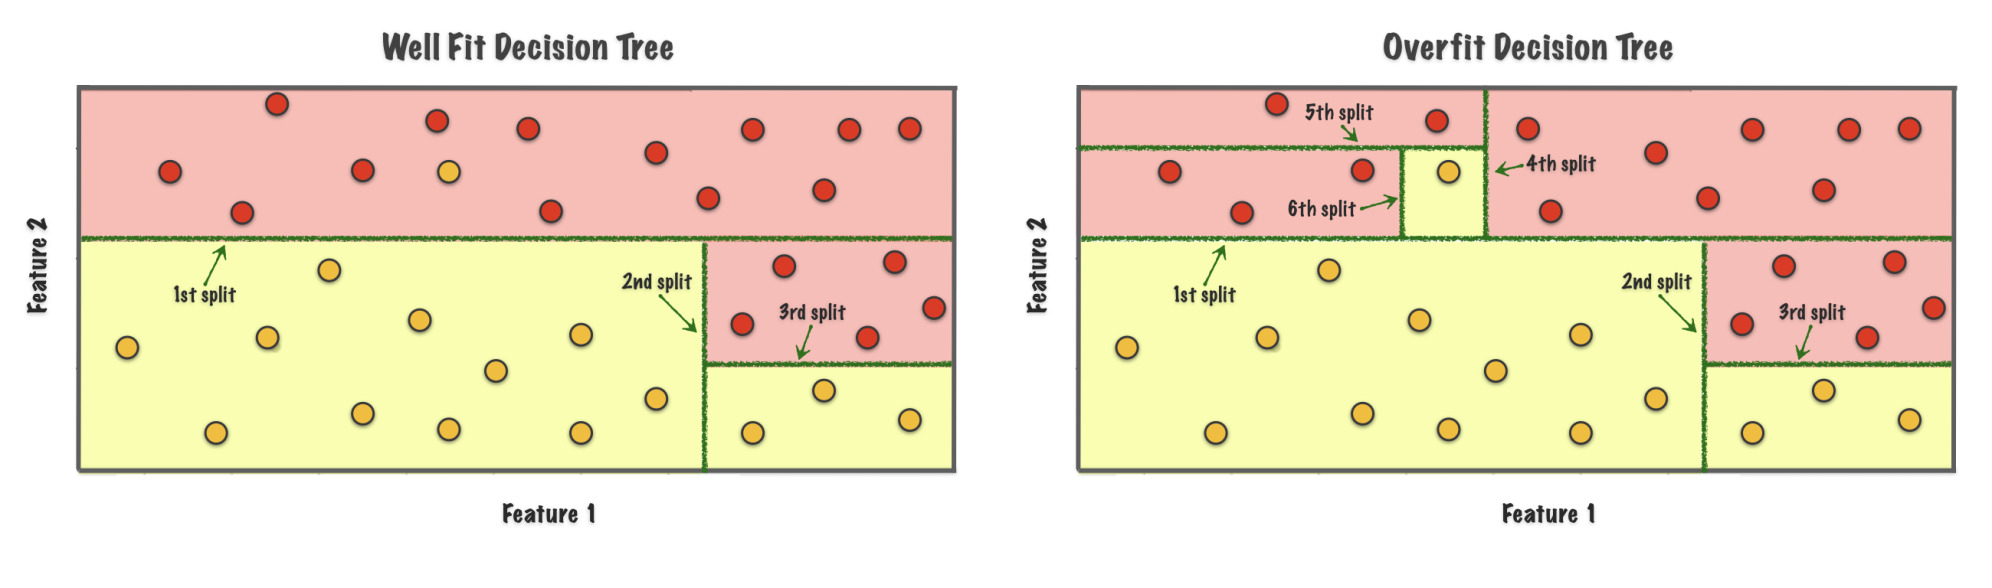

In [10]:
Image('C:/Users/User/Desktop/예시_분류완료.jpg', width = 800, height = 500)

In [11]:
# wine dataset으로 해보는 Decision Tree

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# matplotlib 한글 문제
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = "c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)

In [12]:
red_df = pd.read_csv('C:/Users/User/Desktop/winequality-red.csv', sep = ';', header = 0, engine = 'python')
white_df = pd.read_csv('C:/Users/User/Desktop/winequality-white.csv', sep = ';', header = 0, engine = 'python')

In [13]:
# 각 데이터에 레드/화이트 와인을 구별할 수 있는 type 변수 추가
red_df['class'] = 0
white_df['class'] = 1

In [14]:
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [15]:
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [16]:
wine = pd.concat([red_df, white_df])
wine.shape

(6497, 13)

In [17]:
## 변수 공간 제거 (빈공간 '_' (under score)로 변경)
wine.columns = wine.columns.str.replace(' ', '_')
wine.columns # 변경된 변수명 확인

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'class'],
      dtype='object')

In [26]:
# 독립변수와 종속변수 분리
X = wine[['alcohol', 'residual_sugar', 'pH']]
Y = pd.DataFrame(wine['class'])

In [27]:
import statsmodels.api as sm

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
# 학습 데이터, 테스트 데이터 분리
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=1234, stratify=Y)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(4547, 3) (1950, 3) (4547, 1) (1950, 1)


In [30]:
X_train_dt.head()

,alcohol,residual_sugar,pH
484,9.6,6.6,3.29
3578,11.2,1.2,3.10
2705,9.4,6.4,3.19
3968,9.5,7.9,3.16
3050,9.6,1.7,3.53


In [31]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 1234)
dt.fit(X_train_dt, Y_train)
# 정확도 출력
print(dt.score(X_train_dt, Y_train))
print(dt.score(X_test_dt, Y_test))

0.9973608972949197
0.8661538461538462


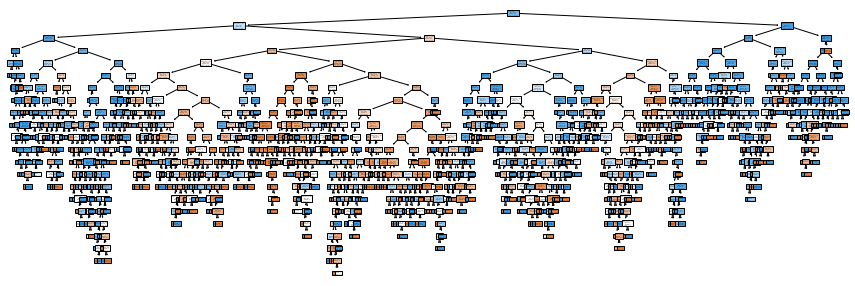

In [32]:
from sklearn.tree import plot_tree
plt.figure(figsize = (15, 5))
plot_tree(dt, filled = True, feature_names = ['alcohol', 'residual_sugar', 'pH'])
plt.show()

아무런 조건이 없으면 full-tree, 그러니까 모든 영역의 지니계수들이 0이 될때까지(불순도가 전부 0이 될때까지) 분류한다. 이는 결정 트리의 최대 장점인 간단하다는 것을 완전히 무시해버리는 것이고, 과적합이 일어나기에 적절하지 않다. 이와 같은 문제는 "가지치기(Pruning)"을 통해 해결할 수 있다.

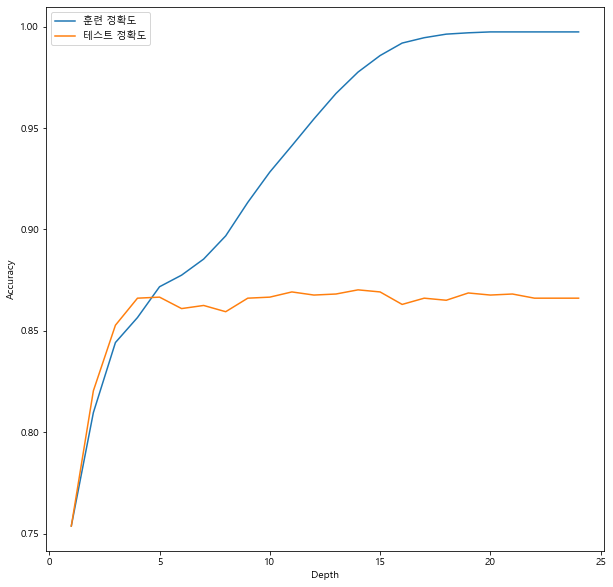

In [33]:
training_accuracy = []
test_accuracy = []

max_depth_settings = range(1, 25)

for k in max_depth_settings:
    # 모델 생성
    dt = DecisionTreeClassifier(max_depth = k, random_state = 1234)
    dt.fit(X_train_dt, Y_train)
    # 정확도 출력
    training_accuracy.append(dt.score(X_train_dt, Y_train))
    test_accuracy.append(dt.score(X_test_dt, Y_test))

# 깊이 증가에 따른 예측정확도 성능 비교
plt.figure(figsize=(10,10))
plt.plot(max_depth_settings, training_accuracy, label="훈련 정확도")
plt.plot(max_depth_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("Accuracy")
plt.xlabel("Depth")
plt.legend()

대충 4 지점이 적절해 보인다. 트리의 깊이를 4로 세팅하고 다시 보도록 하자.

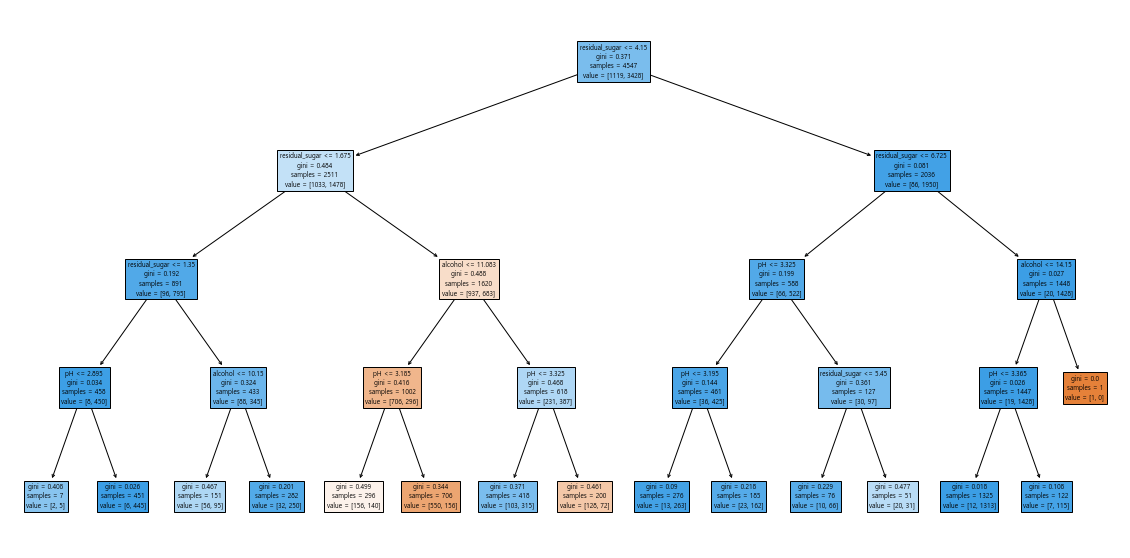

In [35]:
dt = DecisionTreeClassifier(max_depth = 4, random_state = 1234)
dt.fit(X_train_dt, Y_train)
plt.figure(figsize = (20, 10))
plot_tree(dt, filled = True, feature_names = ['alcohol', 'residual_sugar', 'pH'])
plt.show()

In [39]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [40]:
# decision tree prediction
Y_predict_dt = dt.predict(X_test_dt)

In [41]:
# result: decision tree
accuracy = accuracy_score(Y_test, Y_predict_dt)
precision = precision_score(Y_test, Y_predict_dt)
recall = recall_score(Y_test, Y_predict_dt)
f1 = f1_score(Y_test, Y_predict_dt)
print('Accuracy : {0:.3f}'.format(accuracy))
print('Precision : {0:.3f}'.format(precision))
print('Recall : {0:.3f}'.format(recall))
print('F1 : {0:.3f}'.format(f1))

Accuracy : 0.866
Precision : 0.915
Recall : 0.906
F1 : 0.911
